<a href="https://colab.research.google.com/github/Josephcoder123/AI-Tools-Frameworks/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop a deep learning model using TensorFlow or PyTorch to classify handwritten digits from the MNIST dataset. The model should achieve a test accuracy of over 95%. Visualize the model's predictions on 5 sample images. Provide the code for the model architecture, training loop, and evaluation.

## Data loading and preprocessing

### Subtask:
Load the MNIST dataset and preprocess it for model training. This includes normalizing the pixel values and reshaping the images.


**Reasoning**:
Import necessary libraries and load the MNIST dataset, then preprocess the data by normalizing pixel values, reshaping images, and converting labels to one-hot encoding.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to include a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing images shape: (10000, 28, 28, 1)
Testing labels shape: (10000, 10)


## Model definition

### Subtask:
Define the CNN model architecture using TensorFlow or PyTorch.


**Reasoning**:
Define the CNN model architecture using TensorFlow Keras as per the instructions.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Model training

### Subtask:
Train the CNN model on the preprocessed MNIST data.


**Reasoning**:
Train the defined CNN model using the preprocessed training data and validate it with the test data.



In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8361 - loss: 0.5081 - val_accuracy: 0.9846 - val_loss: 0.0496
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9757 - loss: 0.0855 - val_accuracy: 0.9877 - val_loss: 0.0412
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9833 - loss: 0.0596 - val_accuracy: 0.9879 - val_loss: 0.0431
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9862 - loss: 0.0465 - val_accuracy: 0.9898 - val_loss: 0.0342
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9888 - loss: 0.0401 - val_accuracy: 0.9923 - val_loss: 0.0300
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9919 - loss: 0.0302 - val_accuracy: 0.9919 - val_loss: 0.0275
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9910 - loss: 0.0285 - val_accuracy: 0.9927 - val_loss: 0.0326
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9928 -

**Reasoning**:
The task is to load the data and display the first few rows and the columns and their types to understand the structure of the data.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


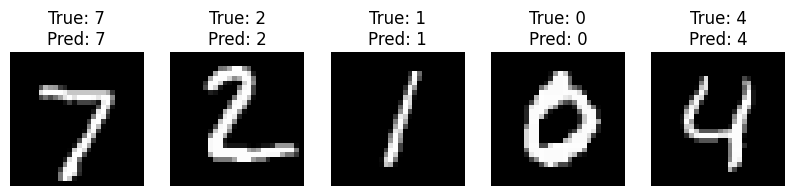

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get 5 sample images and their true labels from the test set
sample_images = test_images[:5]
sample_labels = np.argmax(test_labels[:5], axis=1)

# Get the model's predictions for the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and their predictions
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.0277
Test accuracy: 0.9932
